In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [32]:
plt.style.use('seaborn-v0_8')
plt.style.use('fivethirtyeight')

In [302]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cuisine = 

In [3]:
df_center = pd.read_csv('fulfilment_center_info.csv')
df_meal = pd.read_csv('meal_info.csv')
df_train = pd.read_csv('train.csv')
df = df_train.merge(df_meal,on='meal_id',how='left').merge(df_center,on='center_id',how='left')

In [4]:
df_train

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [8]:
df_train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [283]:
(df['num_orders'] - np.floor(df['num_orders']) != 0).sum()

0

In [284]:
df['num_orders']

0         177
1         270
2         189
3          54
4          40
         ... 
456543     68
456544     42
456545    501
456546    729
456547    162
Name: num_orders, Length: 456548, dtype: int64

In [9]:
df_center

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [14]:
df_center['center_id'].value_counts()

11     1
39     1
10     1
41     1
72     1
      ..
145    1
113    1
146    1
97     1
51     1
Name: center_id, Length: 77, dtype: int64

In [13]:
df_center['center_type'].value_counts()

TYPE_A    43
TYPE_C    19
TYPE_B    15
Name: center_type, dtype: int64

In [286]:
df_center[['center_type','region_code']].groupby(by=['center_type','region_code'],as_index=False).size()

,center_type,region_code,size
0,TYPE_A,23,1
1,TYPE_A,34,10
2,TYPE_A,35,1
3,TYPE_A,56,17
4,TYPE_A,71,1
5,TYPE_A,77,10
6,TYPE_A,85,2
7,TYPE_A,93,1
8,TYPE_B,34,5
9,TYPE_B,56,6


In [16]:
df_center['city_code'].value_counts()

590    9
526    8
638    3
647    2
614    2
676    2
604    2
522    2
576    2
699    2
593    2
517    2
651    1
456    1
695    1
602    1
700    1
703    1
679    1
485    1
685    1
577    1
461    1
702    1
615    1
599    1
579    1
609    1
658    1
683    1
675    1
541    1
659    1
648    1
632    1
553    1
693    1
562    1
478    1
713    1
654    1
515    1
698    1
628    1
680    1
620    1
649    1
596    1
473    1
556    1
561    1
Name: city_code, dtype: int64

In [281]:
len(df_center['city_code'].value_counts())

51

In [17]:
df_center['region_code'].value_counts()

56    30
34    21
77    17
85     5
23     1
71     1
35     1
93     1
Name: region_code, dtype: int64

In [308]:
df_meal.sort_values(by='meal_id')

,meal_id,category,cuisine
6,1062,Beverages,Italian
16,1109,Rice Bowl,Indian
9,1198,Extras,Thai
31,1207,Beverages,Continental
34,1216,Pasta,Italian
30,1230,Beverages,Continental
37,1247,Biryani,Indian
3,1248,Beverages,Indian
5,1311,Extras,Thai
12,1438,Soup,Thai


In [20]:
df_meal['meal_id'].value_counts()

1885    1
2304    1
2664    1
2569    1
1230    1
1207    1
2322    1
2492    1
1216    1
1727    1
1902    1
1247    1
1543    1
2139    1
1770    1
2126    1
1558    1
2581    1
1962    1
1571    1
2956    1
2104    1
2444    1
2867    1
2826    1
2306    1
1993    1
1438    1
2539    1
1248    1
2631    1
1311    1
1062    1
1778    1
1803    1
1198    1
2707    1
1847    1
2494    1
1971    1
2760    1
2490    1
1109    1
2290    1
1525    1
2704    1
1878    1
2640    1
2577    1
1754    1
1445    1
Name: meal_id, dtype: int64

In [21]:
df_meal['category'].value_counts()

Beverages       12
Extras           3
Soup             3
Other Snacks     3
Salad            3
Rice Bowl        3
Starters         3
Sandwich         3
Pasta            3
Desert           3
Biryani          3
Pizza            3
Fish             3
Seafood          3
Name: category, dtype: int64

In [22]:
df_meal['cuisine'].value_counts()

Thai           15
Indian         12
Italian        12
Continental    12
Name: cuisine, dtype: int64

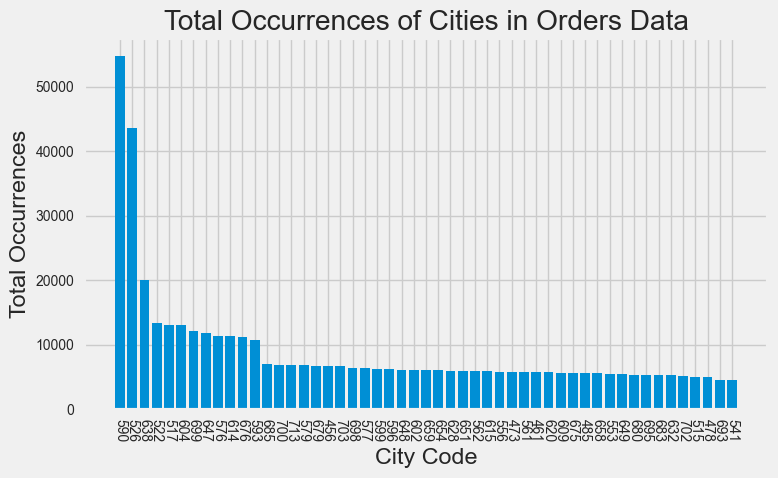

In [72]:
fig,ax = plt.subplots(figsize=(8,5))
temp_df = df['city_code'].value_counts()
plt.bar(temp_df.index.astype(str),temp_df)
plt.title('Total Occurrences of Cities in Orders Data')
plt.xlabel('City Code')
plt.ylabel('Total Occurrences')
plt.xticks(rotation=-90)
plt.tight_layout()

In [289]:
df['num_orders_over_op_area'] = df['num_orders']/df['op_area']

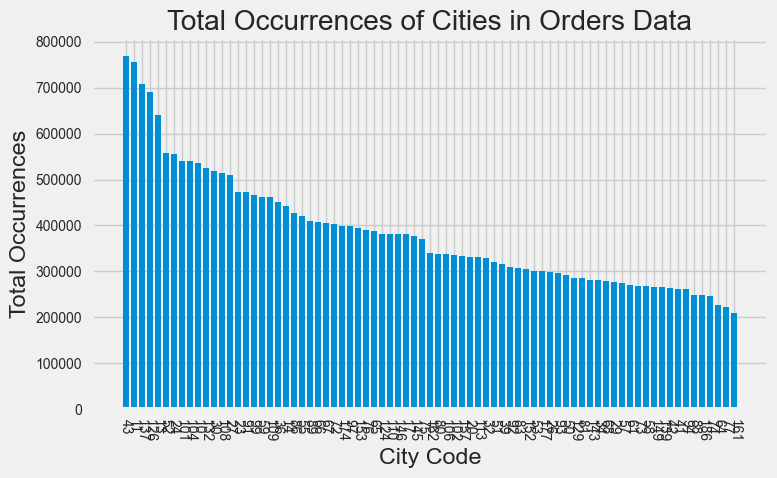

In [293]:
fig,ax = plt.subplots(figsize=(8,5))
temp_df = df[['center_id','num_orders_over_op_area']].groupby(by='center_id',as_index=False).sum().sort_values(by='num_orders_over_op_area',ascending=False)
plt.bar(temp_df['center_id'].astype(str),temp_df['num_orders_over_op_area'])
plt.title('num_orders_over_op_area')
plt.xlabel('City Code')
plt.ylabel('Total Occurrences')
plt.xticks(rotation=-90)
plt.tight_layout()

In [ ]:
fig,ax = plt.subplots(figsize=(8,5))
temp_df = df['city_code'].value_counts()
plt.bar(temp_df.index.astype(str),temp_df)
plt.title('Total Occurrences of Cities in Orders Data')
plt.xlabel('City Code')
plt.ylabel('Total Occurrences')
plt.xticks(rotation=-90)
plt.tight_layout()

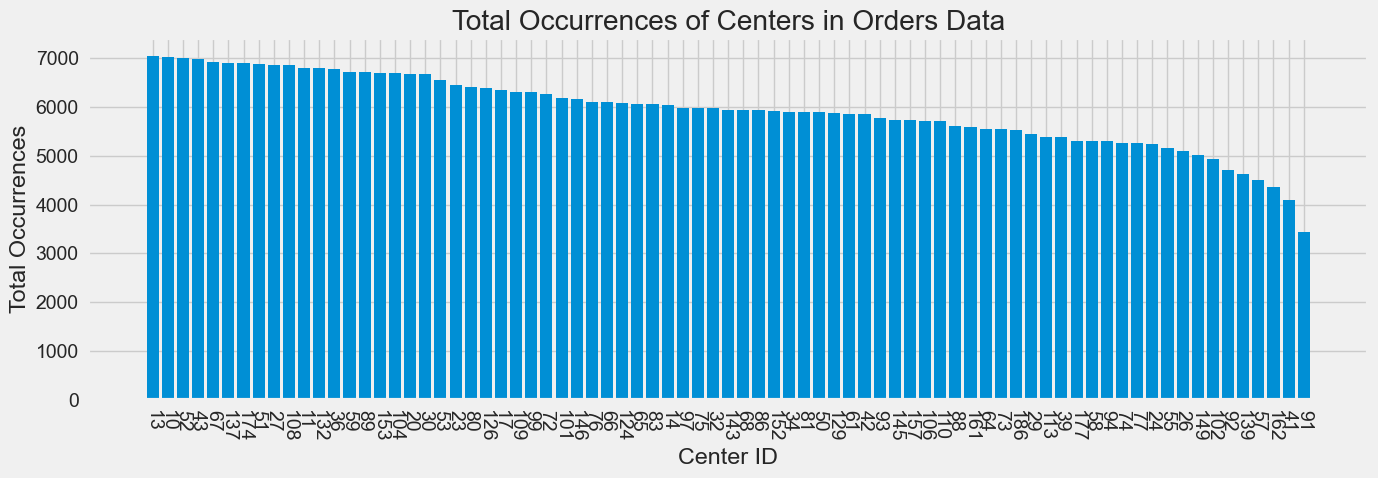

In [65]:
fig,ax = plt.subplots(figsize=(14,5))
temp_df = df['center_id'].value_counts()
plt.bar(temp_df.index.astype(str),temp_df)
plt.title('Total Occurrences of Centers in Orders Data')
plt.xlabel('Center ID')
plt.ylabel('Total Occurrences')
plt.xticks(size=14,rotation=-90)
plt.yticks(size=14)
plt.tight_layout()

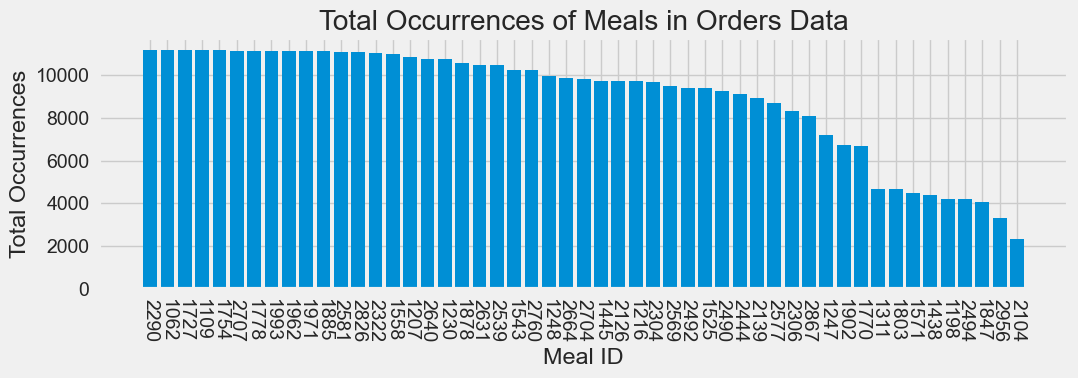

In [61]:
fig,ax = plt.subplots(figsize=(11,4))
temp_df = df['meal_id'].value_counts()
plt.bar(temp_df.index.astype(str),temp_df)
plt.title('Total Occurrences of Meals in Orders Data')
plt.xlabel('Meal ID')
plt.ylabel('Total Occurrences')
plt.xticks(size=14,rotation=-90)
plt.yticks(size=14)
plt.tight_layout()

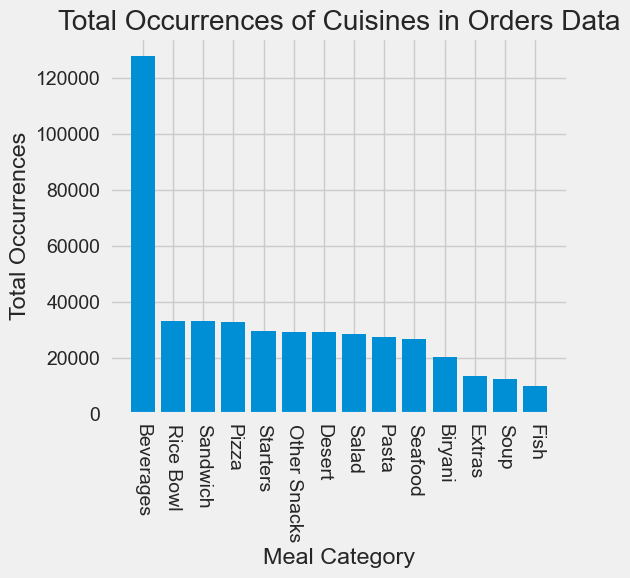

In [82]:
fig,ax = plt.subplots(figsize=(6,6))
temp_df = df['category'].value_counts()
plt.bar(temp_df.index.astype(str),temp_df)
plt.title('Total Occurrences of Cuisines in Orders Data')
plt.xlabel('Meal Category')
plt.ylabel('Total Occurrences')
plt.xticks(size=14,rotation=-90)
plt.yticks(size=14)
plt.tight_layout()

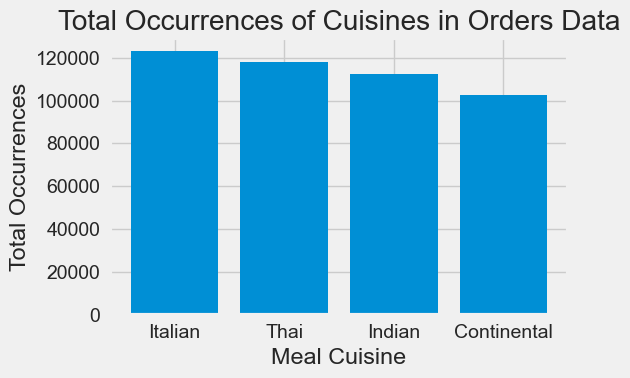

In [190]:
fig,ax = plt.subplots(figsize=(6,4))
temp_df = df['cuisine'].value_counts()
plt.bar(temp_df.index.astype(str),temp_df)
plt.title('Total Occurrences of Cuisines in Orders Data')
plt.xlabel('Meal Cuisine')
plt.ylabel('Total Occurrences')
plt.xticks(size=14)
plt.yticks(size=14)
plt.tight_layout()

,cuisine,center_id,num_orders
0,Continental,10,393530
1,Continental,11,298545
2,Continental,13,450978
3,Continental,14,203932
4,Continental,17,172809
...,...,...,...
303,Thai,161,260294
304,Thai,162,60639
305,Thai,174,978810
306,Thai,177,184868


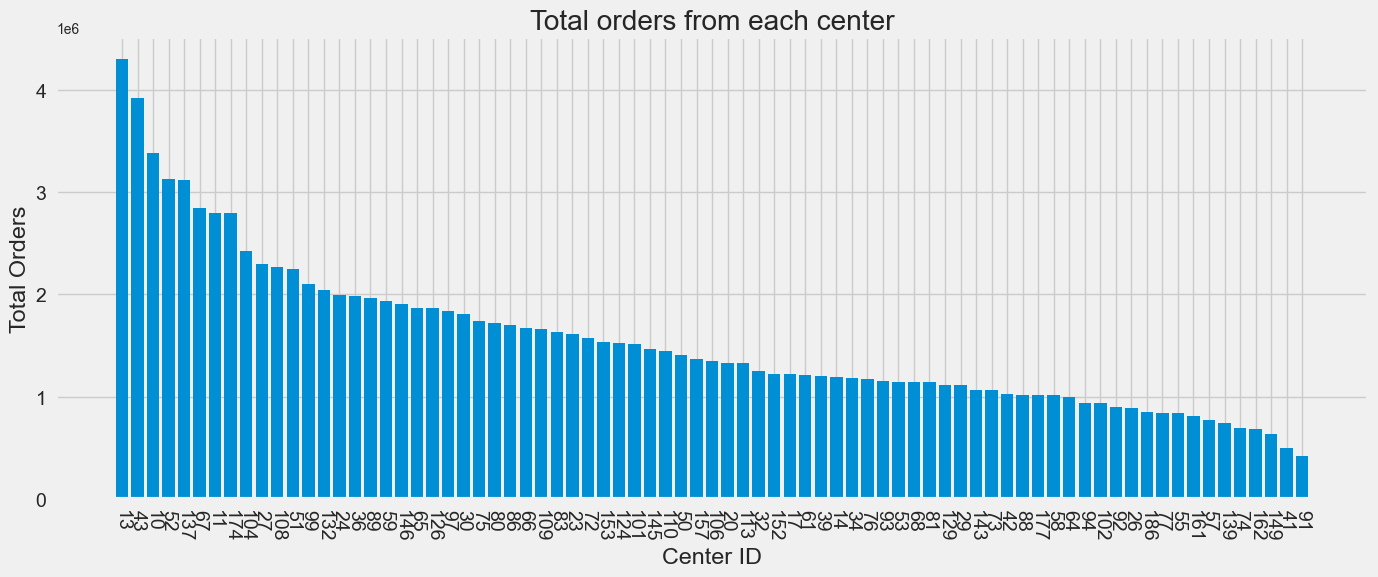

In [301]:
fig,ax = plt.subplots(figsize=(14,6))
temp_df = df[['center_id','num_orders']].groupby(by=['center_id'],as_index=False).sum().sort_values(by='num_orders',ascending=False)
plt.bar(temp_df['center_id'].astype(str),temp_df['num_orders'])
plt.title('Total orders from each center')
plt.xlabel('Center ID')
plt.ylabel('Total Orders')
plt.xticks(size=14,rotation=-90)
plt.yticks(size=14)
plt.tight_layout()
plt.savefig('./figs/totalordersbycenter.pdf')

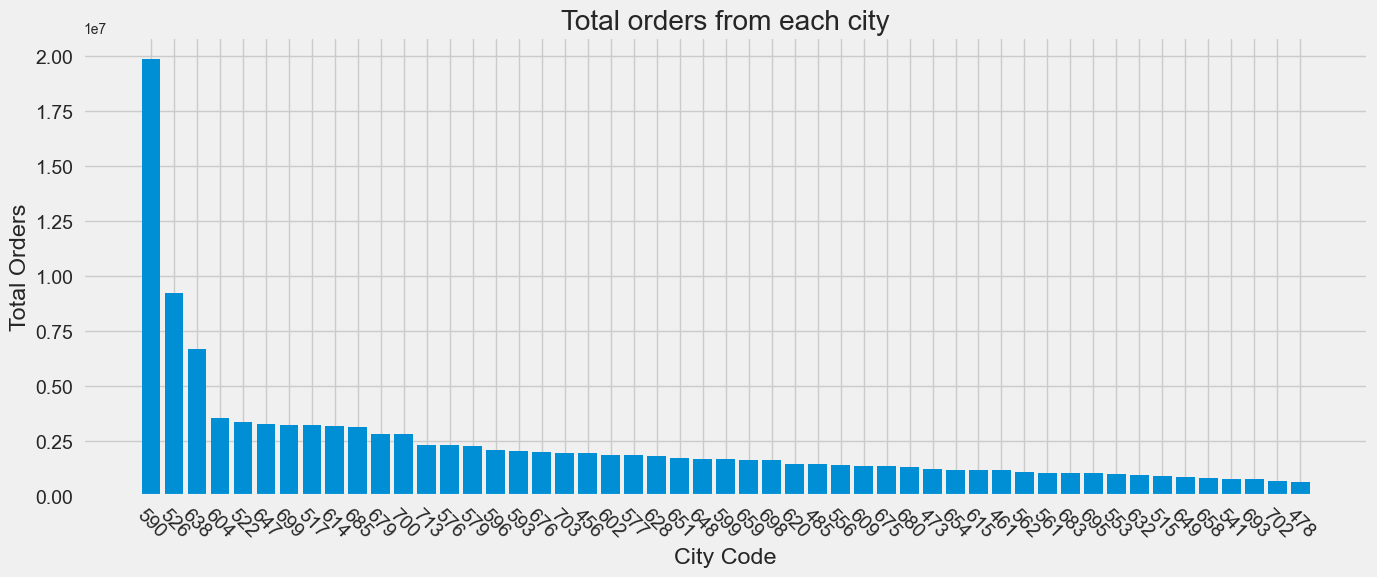

In [250]:
fig,ax = plt.subplots(figsize=(14,6))
temp_df = df[['city_code','num_orders']].groupby(by=['city_code'],as_index=False).sum().sort_values(by='num_orders',ascending=False)
plt.bar(temp_df['city_code'].astype(str),temp_df['num_orders'])
plt.title('Total orders from each city')
plt.xlabel('City Code')
plt.ylabel('Total Orders')
plt.xticks(size=14,rotation=-45)
plt.yticks(size=14)
plt.tight_layout()
plt.savefig('./figs/totalordersbycity.pdf')

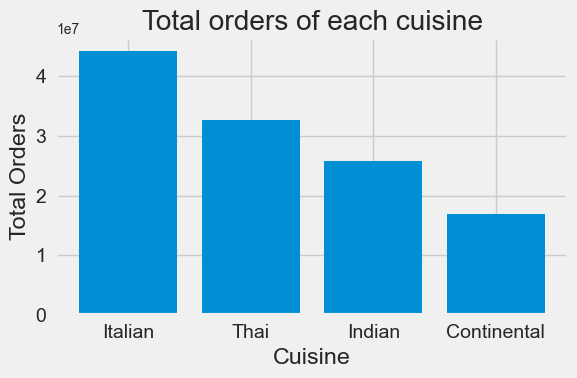

In [249]:
fig,ax = plt.subplots(figsize=(6,4))
temp_df = df[['cuisine','num_orders']].groupby(by=['cuisine'],as_index=False).sum().sort_values(by='num_orders',ascending=False)
plt.bar(temp_df['cuisine'].astype(str),temp_df['num_orders'])
plt.title('Total orders of each cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Total Orders')
plt.xticks(size=14)
plt.yticks(size=14)
plt.tight_layout()
plt.savefig('./figs/totalordersbycuisine.pdf')

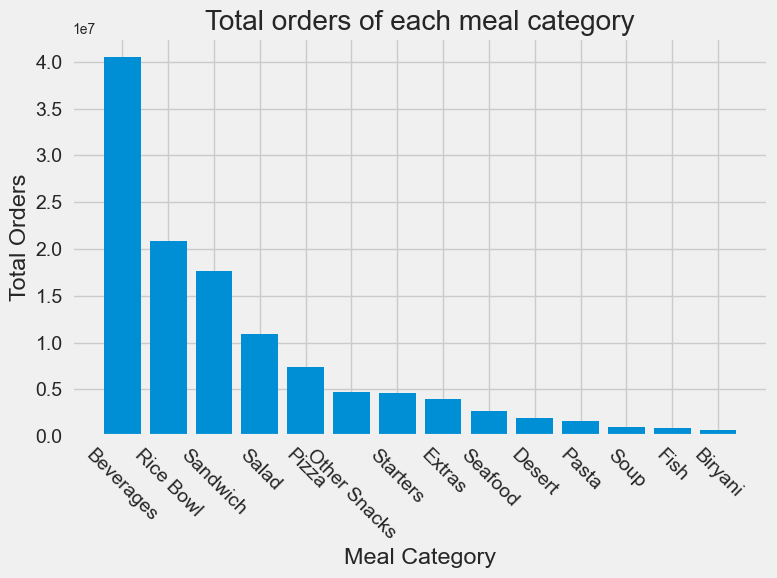

In [248]:
fig,ax = plt.subplots(figsize=(8,6))
temp_df = df[['category','num_orders']].groupby(by=['category'],as_index=False).sum().sort_values(by='num_orders',ascending=False)
plt.bar(temp_df['category'].astype(str),temp_df['num_orders'])
plt.title('Total orders of each meal category')
plt.xlabel('Meal Category')
plt.ylabel('Total Orders')
plt.xticks(size=14,rotation=-45)
plt.yticks(size=14)
plt.tight_layout()
plt.savefig('./figs/totalordersbycategory.pdf')

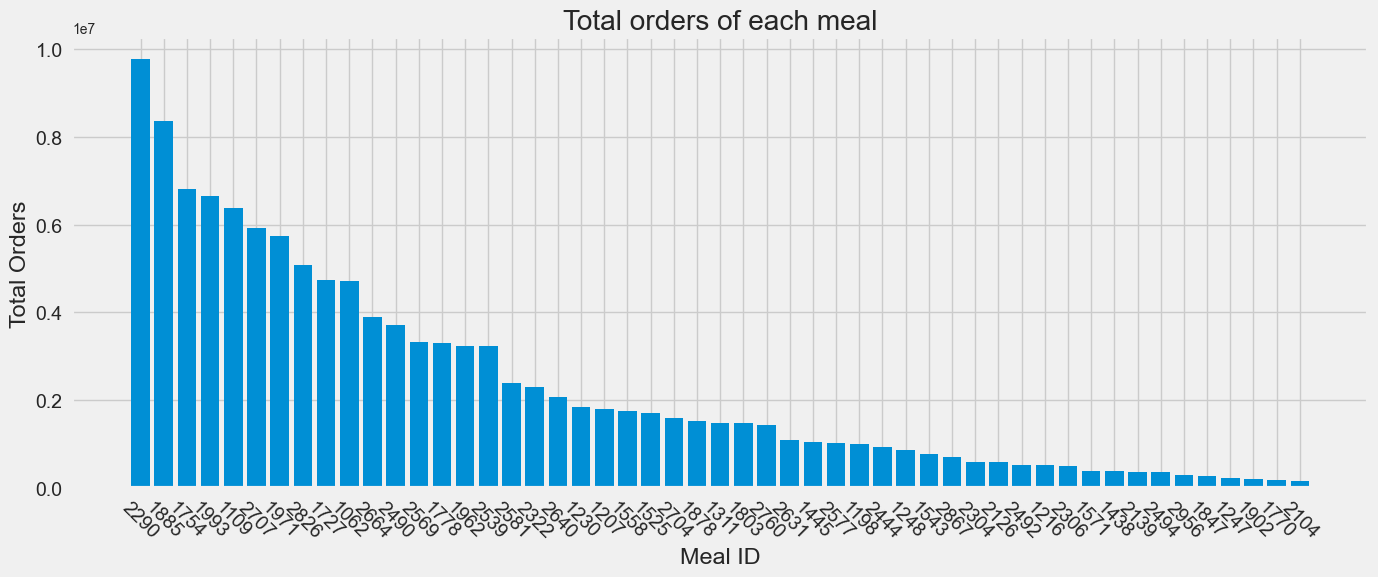

In [294]:
fig,ax = plt.subplots(figsize=(14,6))
temp_df = df[['meal_id','num_orders']].groupby(by=['meal_id'],as_index=False).sum().sort_values(by='num_orders',ascending=False)
plt.bar(temp_df['meal_id'].astype(str),temp_df['num_orders'])
plt.title('Total orders of each meal')
plt.xlabel('Meal ID')
plt.ylabel('Total Orders')
plt.xticks(size=14,rotation=-45)
plt.yticks(size=14)
plt.tight_layout()
plt.savefig('./figs/totalordersbymeal.pdf')

C:\Users\alexpc2red\AppData\Local\Temp\ipykernel_13336\1628316071.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_df2 = temp_df.groupby(by='center_id',as_index=False).sum()


<AxesSubplot: xlabel='center_id'>

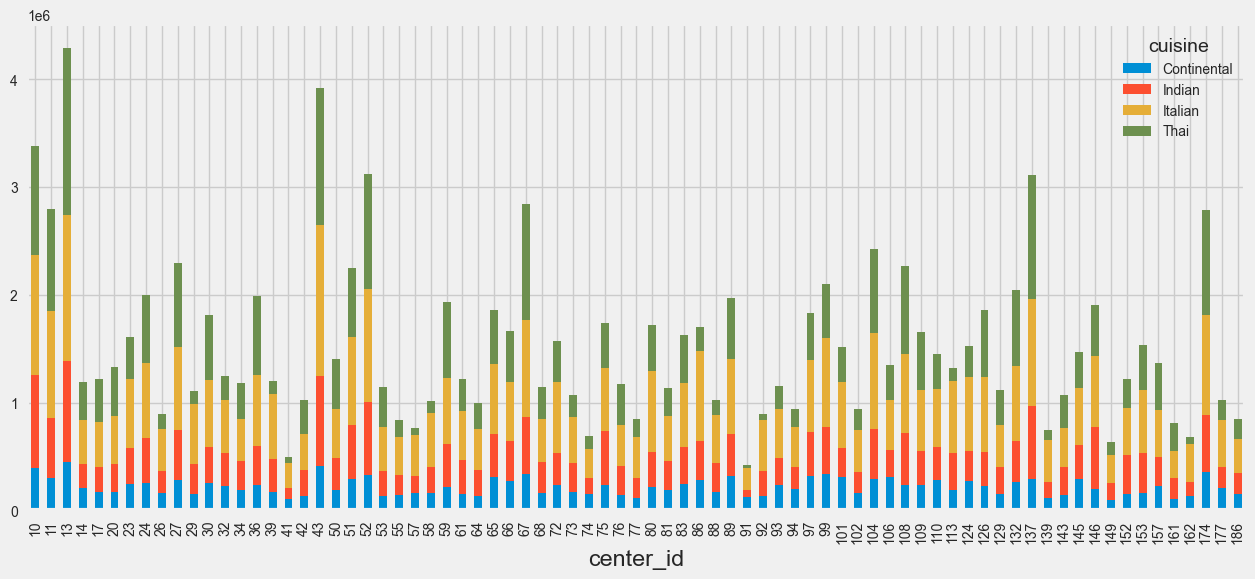

In [173]:
fig,ax = plt.subplots(figsize=(14,6))
temp_df = df[['cuisine','center_id', 'num_orders']].groupby(by=['cuisine', 'center_id'],as_index=False).sum().sort_values(by='num_orders',ascending=False)
temp_df2 = temp_df.groupby(by='center_id',as_index=False).sum()
temp_df2['total'] = temp_df2['num_orders']
temp_df2 = temp_df2.drop('num_orders',axis=1)
temp_df3 = temp_df.merge(temp_df2,on='center_id',how='left').sort_values(by='total',ascending=False)
temp_df3.pivot(index='center_id',columns='cuisine',values='num_orders').plot(kind='bar',stacked=True,ax=ax)
plt.tight_layout()

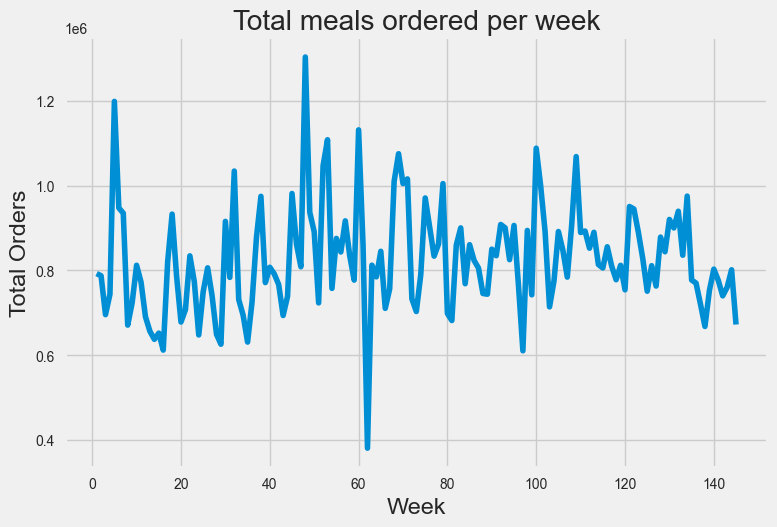

In [288]:
fig,ax = plt.subplots()
temp_df = df[['week','num_orders']].groupby(by=['week'],as_index=False).sum()
sns.lineplot(data=temp_df,x='week',y='num_orders',ax=ax)
ax.set_title('Total meals ordered per week')
ax.set_xlabel('Week')
ax.set_ylabel('Total Orders')
plt.tight_layout()
plt.savefig('./figs/ordersperweek.pdf')

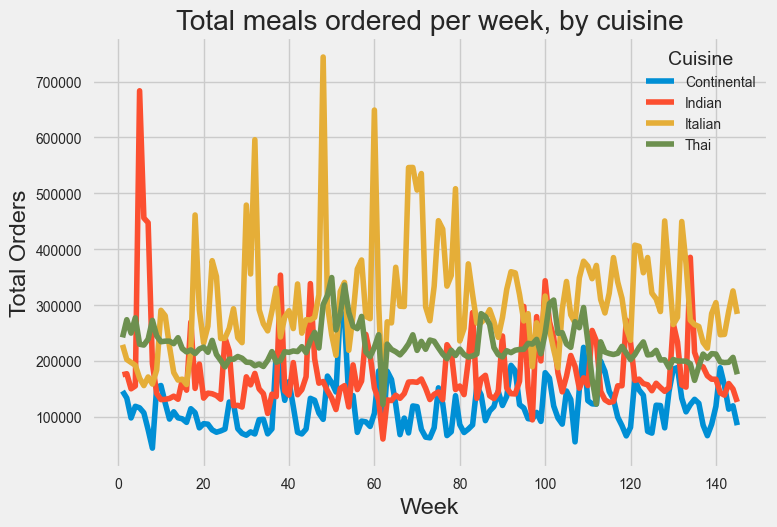

In [305]:
fig,ax = plt.subplots()
temp_df = df[['week','cuisine','num_orders']].groupby(by=['week','cuisine'],as_index=False).sum()
sns.lineplot(data=temp_df,x='week',y='num_orders',hue='cuisine',ax=ax)
ax.set_title('Total meals ordered per week, by cuisine')
ax.set_xlabel('Week')
ax.set_ylabel('Total Orders')
ax.legend(title='Cuisine',loc='upper right')
plt.tight_layout()
plt.savefig('./figs/ordersperweekbycuisine.pdf')

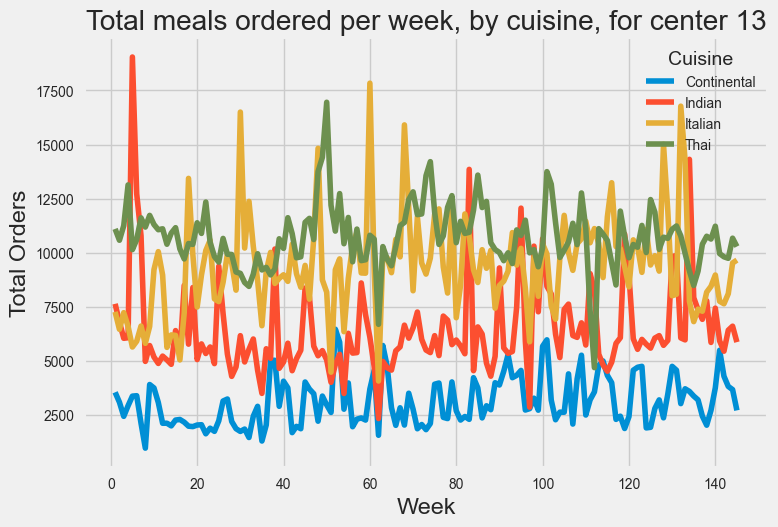

In [306]:
fig,ax = plt.subplots()
temp_df = df.query('center_id==13')[['week','cuisine','num_orders']].groupby(by=['week','cuisine'],as_index=False).sum()
sns.lineplot(data=temp_df,x='week',y='num_orders',hue='cuisine',ax=ax)
ax.set_title('Total meals ordered per week, by cuisine, for center 13')
ax.set_xlabel('Week')
ax.set_ylabel('Total Orders')
ax.legend(title='Cuisine',loc='upper right')
plt.tight_layout()
plt.savefig('./figs/ordersperweekbycuisine13.pdf')

In [206]:
temp_df_italian = temp_df[temp_df['cuisine']=='Italian']
temp_df_italian[temp_df_italian['num_orders']>12500]

,week,cuisine,num_orders
70,18,Italian,13434
118,30,Italian,16501
190,48,Italian,14825
238,60,Italian,17838
270,68,Italian,15908
462,116,Italian,13233
510,128,Italian,15010
526,132,Italian,16774
530,133,Italian,14274


In [205]:
temp_df[temp_df['cuisine']=='Italian']['num_orders']>12500

2      False
6      False
10     False
14     False
18     False
       ...  
562    False
566    False
570    False
574    False
578    False
Name: num_orders, Length: 145, dtype: bool

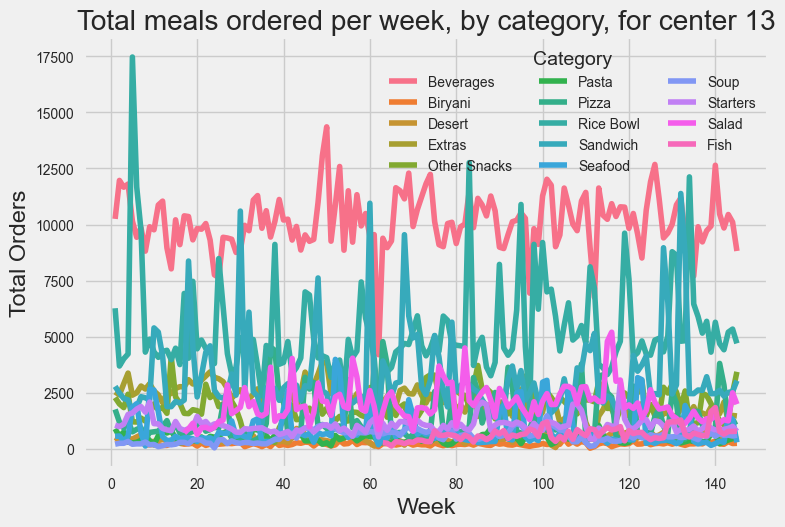

In [224]:
fig,ax = plt.subplots()
temp_df = df.query('center_id==13')[['week','category','num_orders']].groupby(by=['week','category'],as_index=False).sum()
sns.lineplot(data=temp_df,x='week',y='num_orders',hue='category',ax=ax)
ax.set_title('Total meals ordered per week, by category, for center 13')
ax.set_xlabel('Week')
ax.set_ylabel('Total Orders')
ax.legend(title='Category',ncols=3)
plt.tight_layout()

In [207]:
common_meals = df[['meal_id','num_orders']].groupby(by='meal_id',as_index=False).sum().sort_values(by='num_orders',ascending=False)

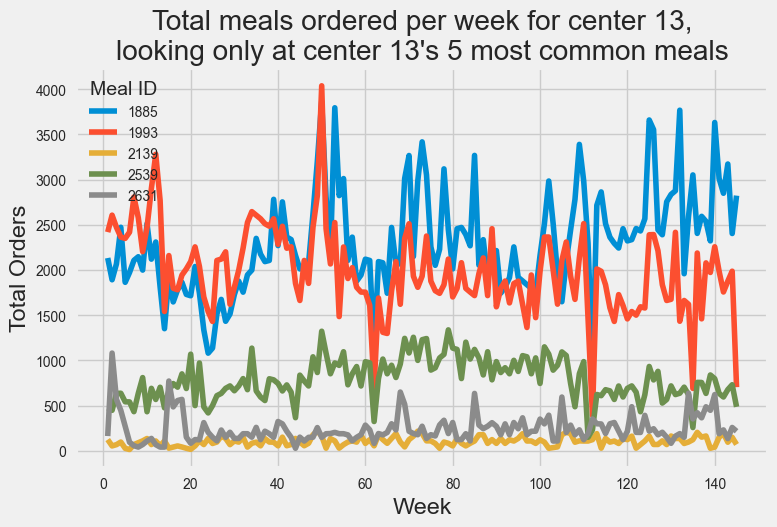

In [307]:
fig,ax = plt.subplots()
center_df = df[df['center_id']==13]
center_common_meals = center_df[['meal_id','num_orders']].groupby(by='meal_id',as_index=False).sum().sort_values(by='num_orders',ascending=False)
center_most_common_meals = center_df['meal_id'][:5]
temp_df = center_df[center_df['meal_id'].isin(center_most_common_meals)][['week','meal_id','num_orders']].groupby(by=['week','meal_id'],as_index=False).sum()
temp_df['meal_id'] = temp_df['meal_id'].astype(str)
sns.lineplot(data=temp_df,x='week',y='num_orders',hue='meal_id',ax=ax)
ax.set_title('Total meals ordered per week for center 13,\nlooking only at center 13\'s 5 most common meals')
ax.set_xlabel('Week')
ax.set_ylabel('Total Orders')
ax.legend(title='Meal ID')
plt.tight_layout()
plt.savefig('./figs/ordersperweek5meals13.pdf')

     week center_id  num_orders
0       1        11         703
1       1        24         998
2       1        32         770
3       1        55         162
4       1        83         634
..    ...       ...         ...
695   145        11         566
696   145        24        1053
697   145        32         338
698   145        55          96
699   145        83         190

[700 rows x 3 columns]


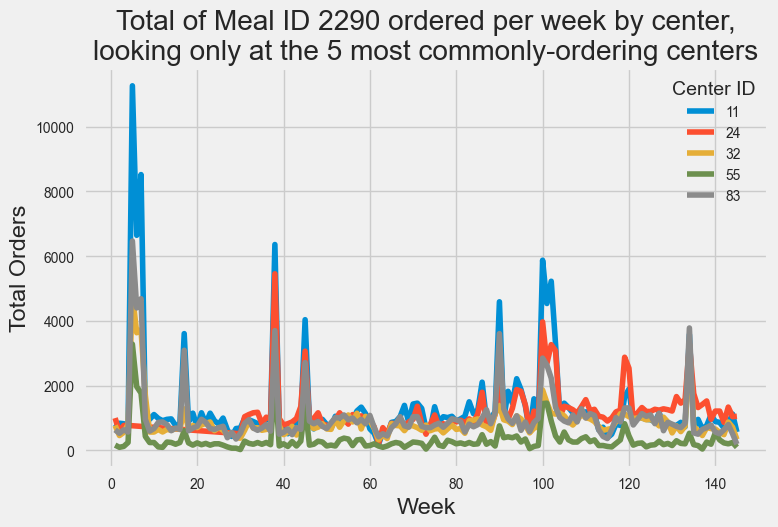

In [243]:
fig,ax = plt.subplots()
meal_df = df[df['meal_id']==2290]
meal_common_centers = meal_df[['center_id','num_orders']].groupby(by='center_id',as_index=False).sum().sort_values(by='num_orders',ascending=False)
meal_most_common_centers = meal_df['center_id'][:5]
temp_df = meal_df[meal_df['center_id'].isin(meal_most_common_centers)][['week','center_id','num_orders']].groupby(by=['week','center_id'],as_index=False).sum()
temp_df['center_id'] = temp_df['center_id'].astype(str)
print(temp_df)
sns.lineplot(data=temp_df,x='week',y='num_orders',hue='center_id',ax=ax)
ax.set_title('Total of Meal ID 2290 ordered per week by center,\nlooking only at the 5 most commonly-ordering centers')
ax.set_xlabel('Week')
ax.set_ylabel('Total Orders')
ax.legend(title='Center ID')
plt.tight_layout()

In [233]:
df_meal[df_meal['meal_id'].isin([1885,1993,2139,2539,2631])]

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
4,2631,Beverages,Indian
26,2139,Beverages,Indian


In [241]:
df_meal[df_meal['meal_id'].isin([2290])]

,meal_id,category,cuisine
17,2290,Rice Bowl,Indian


In [254]:
center_ids = list(df_center['center_id'].unique())
meal_ids = list(df_meal['meal_id'].unique())
center_meal_weekly_df_dict = []
for i in range(1,146):
    for center_id in center_ids:
        row_dict = {}
        row_dict['week'] = i
        row_dict['center_id'] = center_id
        week_center_df = df_train[(df_train['week']==i) & (df_train['center_id']==center_id)]
        for meal_id in meal_ids:
            if meal_id in list(week_center_df['meal_id']):
                row_dict[meal_id] = week_center_df[week_center_df['meal_id'] == meal_id]['num_orders'].iloc[0]
            else:
                row_dict[meal_id] = 0
        center_meal_weekly_df_dict.append(row_dict)
        
center_meal_weekly_df = pd.DataFrame(center_meal_weekly_df_dict)

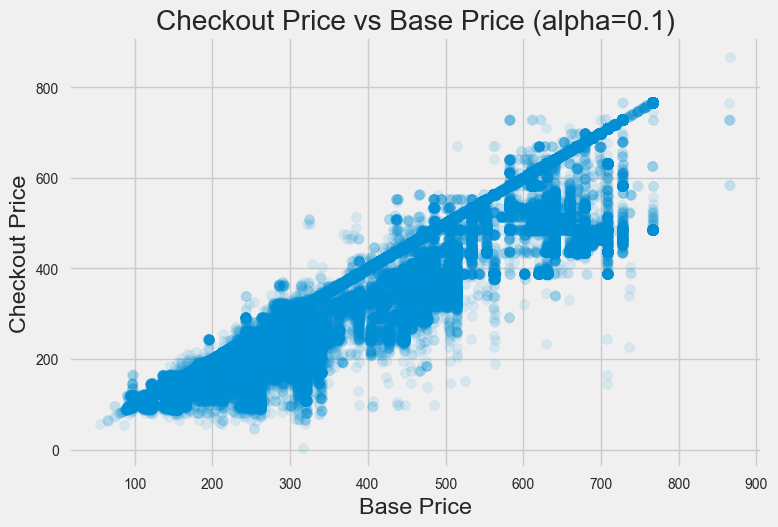

In [326]:
plt.scatter(df['base_price'],df['checkout_price'],alpha=0.1)
plt.title('Checkout Price vs Base Price (alpha=0.1)')
plt.xlabel('Base Price')
plt.ylabel('Checkout Price')
plt.tight_layout()
plt.savefig('./figs/checkoutvsbase.png')

In [320]:
np.corrcoef([df['base_price'],df['checkout_price']])

array([[1.        , 0.95338907],
       [0.95338907, 1.        ]])

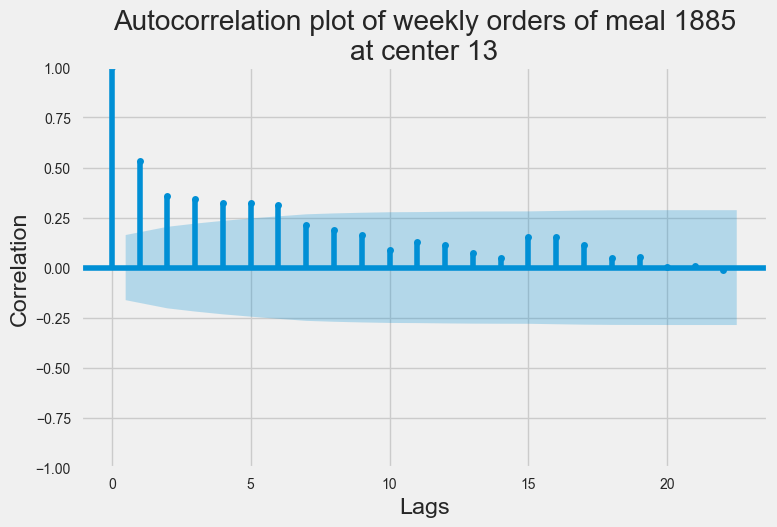

In [311]:
fig,ax=plt.subplots()
center_13_meal_1885_weekly = center_meal_weekly_df[center_meal_weekly_df['center_id']==13][1885]
plot_acf(center_13_meal_1885_weekly,ax=ax);
ax.set_title('Autocorrelation plot of weekly orders of meal 1885\nat center 13')
ax.set_xlabel('Lags')
ax.set_ylabel('Correlation')
plt.tight_layout()
fig.savefig('./figs/acf_13_1885.pdf')

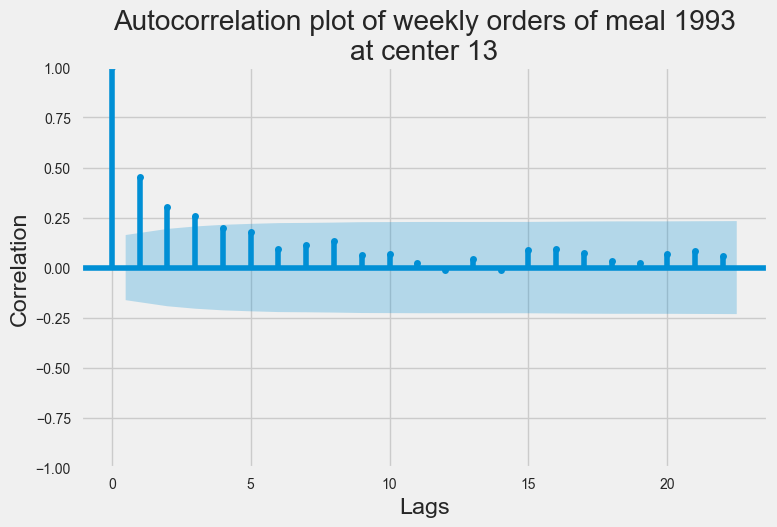

In [312]:
fig,ax=plt.subplots()
center_13_meal_1993_weekly = center_meal_weekly_df[center_meal_weekly_df['center_id']==13][1993]
plot_acf(center_13_meal_1993_weekly,ax=ax);
ax.set_title('Autocorrelation plot of weekly orders of meal 1993\nat center 13')
ax.set_xlabel('Lags')
ax.set_ylabel('Correlation')
plt.tight_layout()
fig.savefig('./figs/acf_13_1993.pdf')

In [274]:
df['revenue'] = df['checkout_price']*df['num_orders']
df['revenue_over_op_area'] = df['revenue']/df['op_area']

In [275]:
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,revenue,revenue_over_op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,24218.91,12109.455000
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0,36944.10,18472.050000
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0,25488.54,12744.270000
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0,18333.00,9166.500000
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0,9740.00,4870.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,Desert,Indian,473,77,TYPE_A,4.5,32918.12,7315.137778
456544,1062036,145,61,2304,482.09,482.09,0,0,42,Desert,Indian,473,77,TYPE_A,4.5,20247.78,4499.506667
456545,1110849,145,61,2664,237.68,321.07,0,0,501,Salad,Italian,473,77,TYPE_A,4.5,119077.68,26461.706667
456546,1147725,145,61,2569,243.50,313.34,0,0,729,Salad,Italian,473,77,TYPE_A,4.5,177511.50,39447.000000


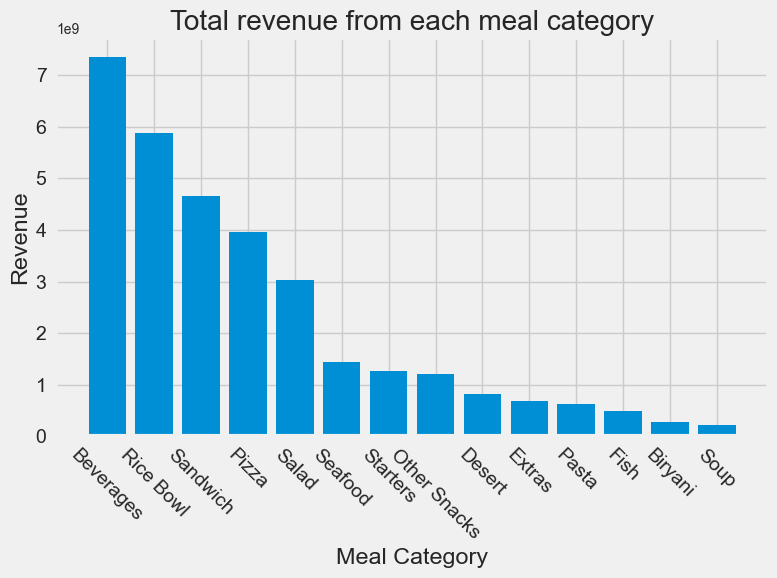

In [273]:
fig,ax = plt.subplots(figsize=(8,6))
temp_df = df[['category','revenue']].groupby(by=['category'],as_index=False).sum().sort_values(by='revenue',ascending=False)
plt.bar(temp_df['category'].astype(str),temp_df['revenue'])
plt.title('Total revenue from each meal category')
plt.xlabel('Meal Category')
plt.ylabel('Revenue')
plt.xticks(size=14,rotation=-45)
plt.yticks(size=14)
plt.tight_layout()
#plt.savefig('./figs/totalrevenuebycategory.pdf')

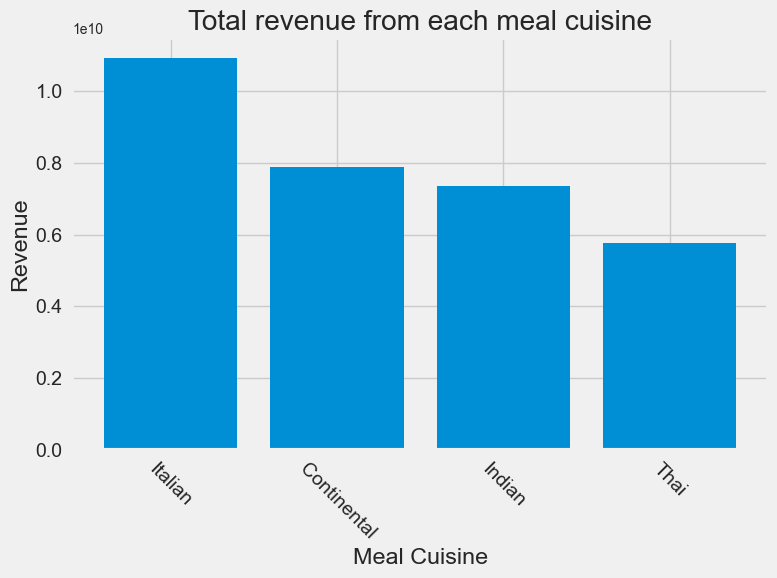

In [278]:
fig,ax = plt.subplots(figsize=(8,6))
temp_df = df[['cuisine','revenue']].groupby(by=['cuisine'],as_index=False).sum().sort_values(by='revenue',ascending=False)
plt.bar(temp_df['cuisine'].astype(str),temp_df['revenue'])
plt.title('Total revenue from each meal cuisine')
plt.xlabel('Meal Cuisine')
plt.ylabel('Revenue')
plt.xticks(size=14,rotation=-45)
plt.yticks(size=14)
plt.tight_layout()
#plt.savefig('./figs/totalrevenuebycategory.pdf')

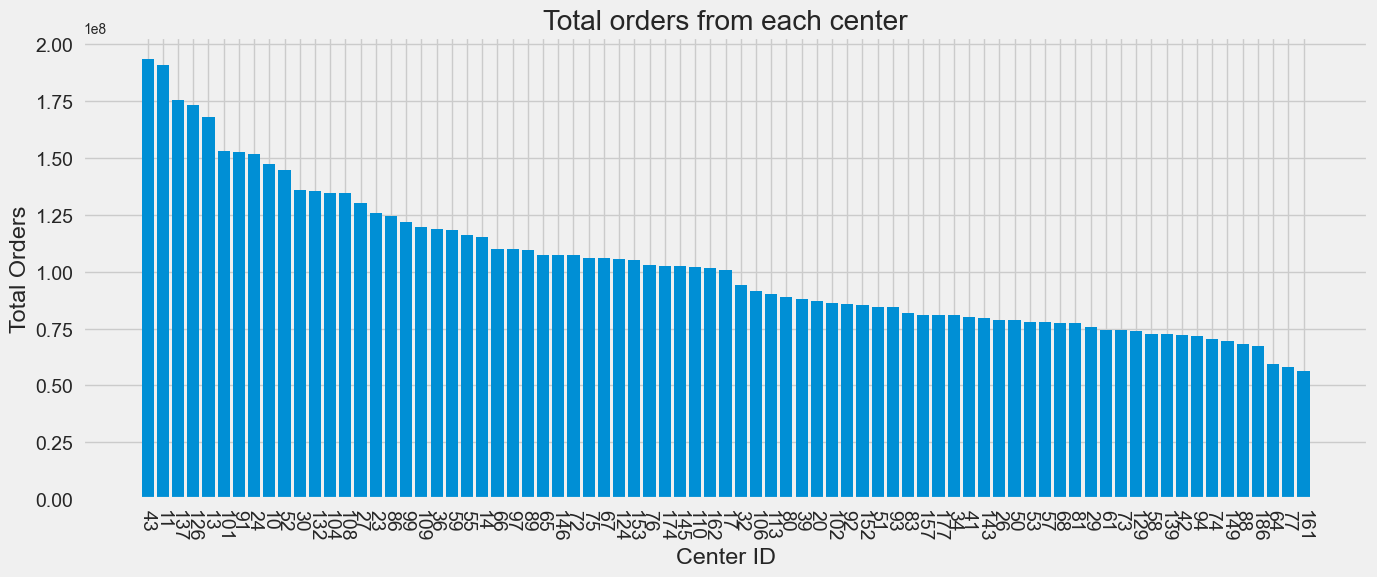

In [279]:
fig,ax = plt.subplots(figsize=(14,6))
temp_df = df[['center_id','revenue_over_op_area']].groupby(by=['center_id'],as_index=False).sum().sort_values(by='revenue_over_op_area',ascending=False)
plt.bar(temp_df['center_id'].astype(str),temp_df['revenue_over_op_area'])
plt.title('Total orders from each center')
plt.xlabel('Center ID')
plt.ylabel('Total Orders')
plt.xticks(size=14,rotation=-90)
plt.yticks(size=14)
plt.tight_layout()
#plt.savefig('./figs/totalordersbycenter.pdf')

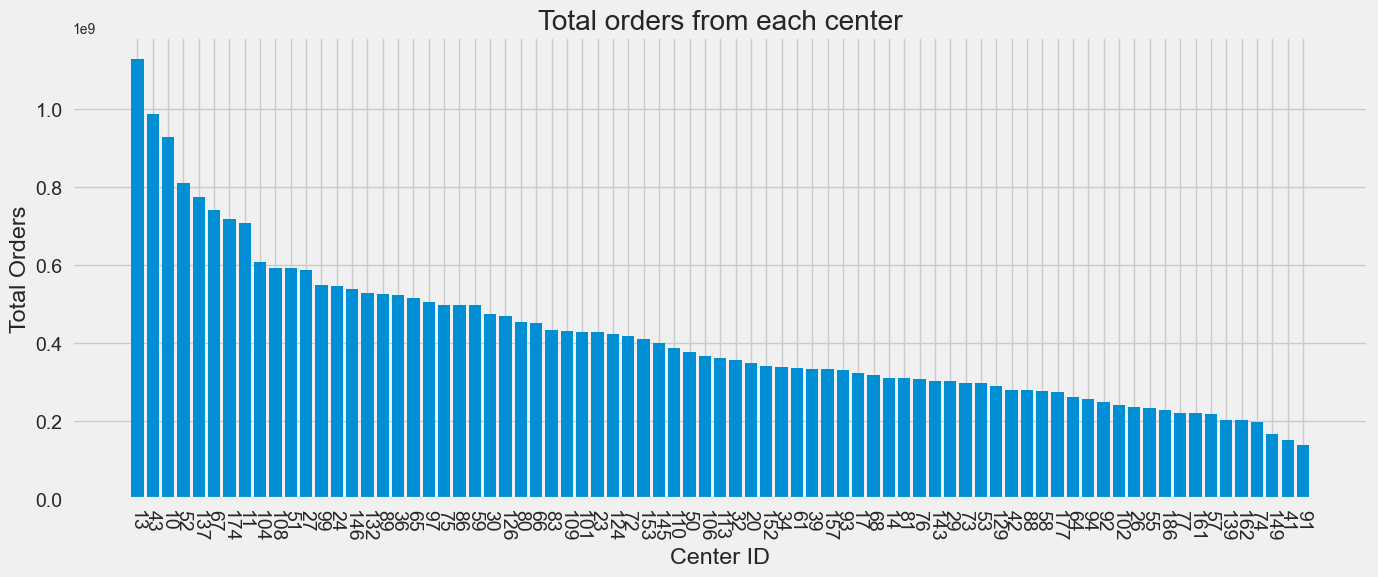

In [280]:
fig,ax = plt.subplots(figsize=(14,6))
temp_df = df[['center_id','revenue']].groupby(by=['center_id'],as_index=False).sum().sort_values(by='revenue',ascending=False)
plt.bar(temp_df['center_id'].astype(str),temp_df['revenue'])
plt.title('Total orders from each center')
plt.xlabel('Center ID')
plt.ylabel('Total Orders')
plt.xticks(size=14,rotation=-90)
plt.yticks(size=14)
plt.tight_layout()
#plt.savefig('./figs/totalordersbycenter.pdf')